In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [88]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/LazyProgrammer/Deep_Learning_Prerequisites__Linear_Regression_in_Python/data_2d.csv', header=None)

if df.isna().sum().max() == 0:
  print('There is no NA values')
else:
  print(f'There are {df.isna().sum().max()} NAs' )

print(df.info())
print(df.head())

There is no NA values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB
None
           0          1           2
0  17.930201  94.520592  320.259530
1  97.144697  69.593282  404.634472
2  81.775901   5.737648  181.485108
3  55.854342  70.325902  321.773638
4  49.366550  75.114040  322.465486


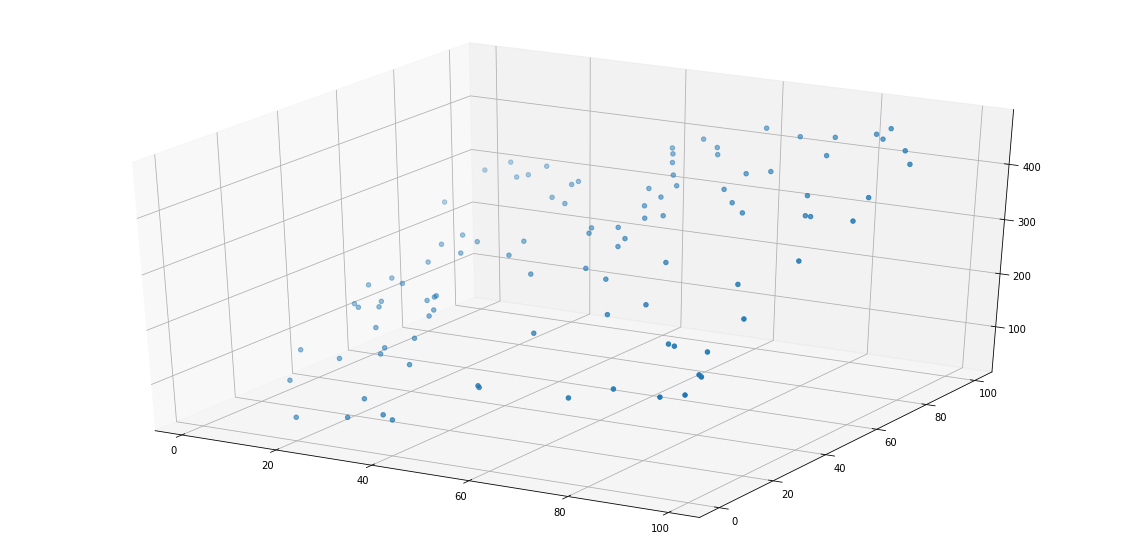

In [89]:
df['b'] = 1
X = df[[0,1,'b']].values
Y = df[2].values

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

In [90]:
def r2(Y, Y_hat):
  res_Y_mean = Y - Y.mean()
  res_Y_hat = Y - Y_hat
  R2 = 1 - res_Y_hat.dot(res_Y_hat) / res_Y_mean.dot(res_Y_mean)
  return R2


def regress(X, Y):
  w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
  Y_hat = X.dot(w)
  
  R2 = r2(Y, Y_hat)
  
  return Y_hat, R2, w

In [91]:
_, R2, _ = regress(X, Y);

print(f'R2 is: {R2}')

R2 is: 0.9980040612475777


# Polynomial

In [92]:
poly_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/LazyProgrammer/Deep_Learning_Prerequisites__Linear_Regression_in_Python/data_poly.csv', header=None, names=['x', 'y'])

if poly_df.isna().sum().max() == 0:
  print('There is no NA values')
else:
  print(f'There are {poly_df.isna().sum().max()} NAs' )

print(poly_df.info())
print(poly_df.head(20))
poly_df.dropna(inplace=True)

There is no NA values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None
            x            y
0   76.700709   663.797276
1   95.273544  1014.362282
2   73.095723   618.938827
3   46.951635   288.012877
4   33.313748   144.977556
5   58.800128   412.327812
6   86.477596   844.415014
7   26.143829    89.351910
8   97.679306  1053.205251
9   43.745316   240.908778
10  27.396060   115.936712
11  97.770938  1034.550540
12   0.477749     3.445085
13  45.823085   254.058886
14  54.805855   353.273447
15  90.152649   926.945049
16   7.250554    30.757737
17  45.325596   241.735204
18  78.029929   692.797189
19  56.999295   382.995647


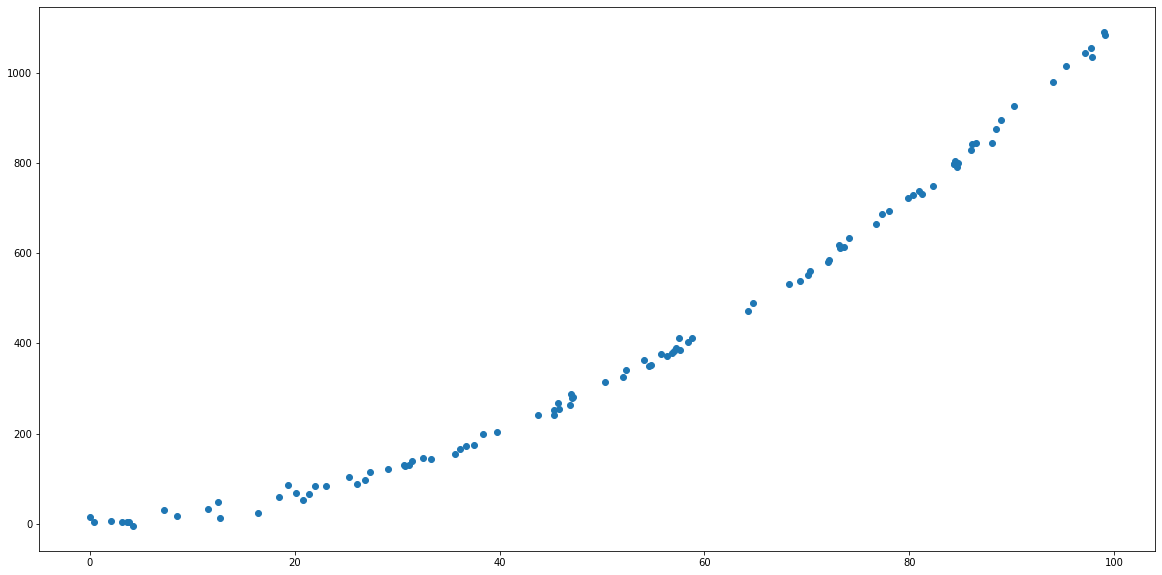

In [93]:
poly_df['b'] = 1
poly_df['x2'] = poly_df['x'] ** 2
X = poly_df[['x', 'x2', 'b']].values
Y = poly_df['y'].values

fig = plt.figure(figsize=(20,10))
plt.scatter(X[:,0], Y);

In [94]:
Y_hat, R2, _ = regress(X, Y);

print(f'R2 is: {R2}')

R2 is: 0.9991412296366858


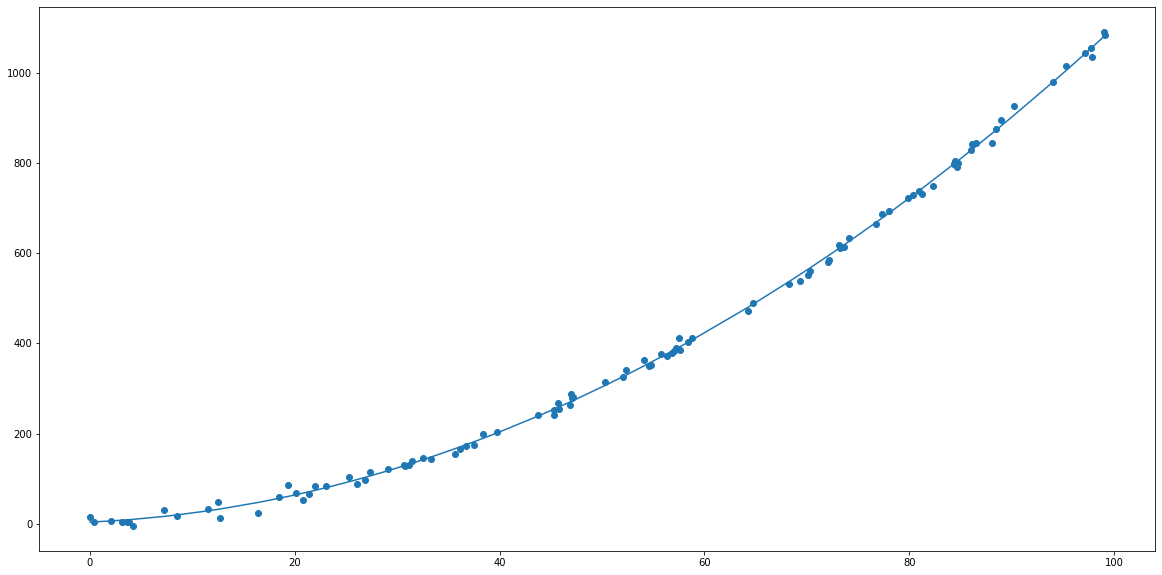

In [95]:
fig = plt.figure(figsize=(20,10))
plt.scatter(X[:,0], Y);
plt.plot(sorted(X[:,0]), sorted(Y_hat));

# Symbolic blood pressure

In [96]:
blood_df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/LazyProgrammer/Deep_Learning_Prerequisites__Linear_Regression_in_Python/mlr02.xls', names=['blood_pressure', 'age', 'weight'])

if blood_df.isna().sum().max() == 0:
  print('There is no NA values')
else:
  print(f'There are {blood_df.isna().sum().max()} NAs' )

print(blood_df.info())
print(blood_df.head(20))
blood_df.dropna(inplace=True)

*** No CODEPAGE record, no encoding_override: will use 'ascii'
There is no NA values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   blood_pressure  11 non-null     int64
 1   age             11 non-null     int64
 2   weight          11 non-null     int64
dtypes: int64(3)
memory usage: 392.0 bytes
None
    blood_pressure  age  weight
0              132   52     173
1              143   59     184
2              153   67     194
3              162   73     211
4              154   64     196
5              168   74     220
6              137   54     188
7              149   61     188
8              159   65     207
9              128   46     167
10             166   72     217


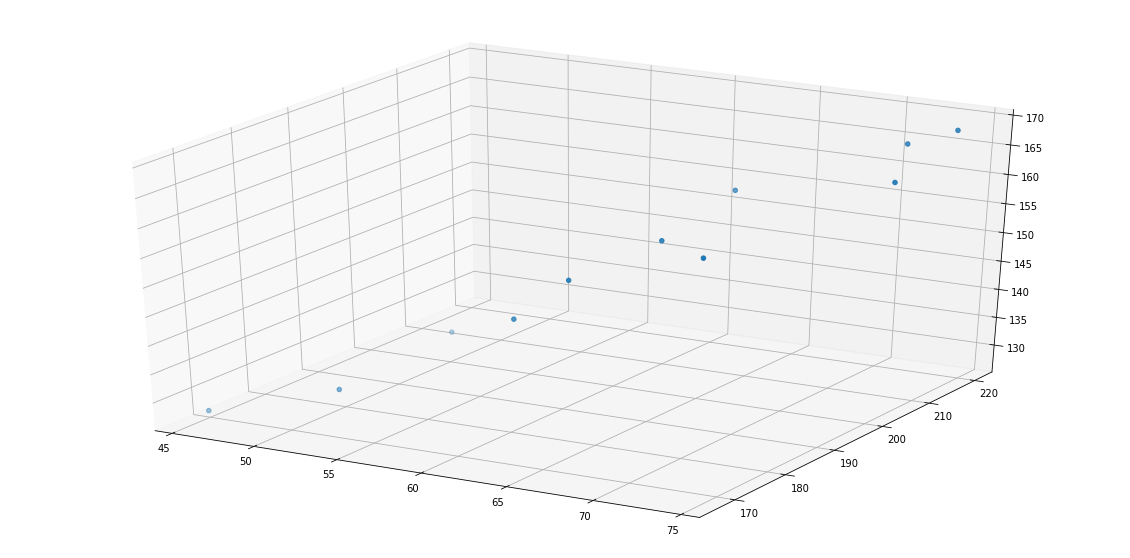

In [97]:
blood_df['b'] = 1
X = blood_df[['age', 'weight', 'b']].values
X_age = blood_df[['age', 'b']].values
X_weight = blood_df[['weight', 'b']].values
Y = blood_df['blood_pressure'].values

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

In [98]:
_, R2, _ = regress(X, Y);
print(f'R2 for full model is: {R2}')

_, R2, _ = regress(X_age, Y);
print(f'R2 for model with age only is: {R2}')

_, R2, _ = regress(X_weight, Y);
print(f'R2 for model with weight only is: {R2}')

R2 for full model is: 0.9768471041502091
R2 for model with age only is: 0.9578407208147353
R2 for model with weight only is: 0.9419952085293064


# Check how random feature affects R2

In [108]:
N = poly_df['x'].shape[0]
poly_df['random'] = np.random.rand(N) * 2 - 1

print(poly_df)

X = poly_df[['x', 'x2', 'b']].values
X_random = poly_df[['x', 'x2', 'random', 'b']].values
Y = poly_df['y'].values

_, R2, w = regress(X, Y);
_, R2_random, w = regress(X_random, Y);
print(f'R2 for full model with additional randomly generated feature is: {R2_random}, whereas for oryginal model it was: {R2}')
print(f'Coefficients: {w}')

            x            y  b           x2    random
0   76.700709   663.797276  1  5882.998700 -0.954841
1   95.273544  1014.362282  1  9077.048216 -0.266553
2   73.095723   618.938827  1  5342.984757  0.109000
3   46.951635   288.012877  1  2204.456072 -0.496579
4   33.313748   144.977556  1  1109.805806  0.185692
..        ...          ... ..          ...       ...
95  45.345860   251.755173  1  2056.246986 -0.554323
96   3.139878     4.262618  1     9.858834  0.609493
97  70.106284   550.923455  1  4914.890991  0.967864
98  80.310683   728.069848  1  6449.805786 -0.207998
99  72.068044   581.130211  1  5193.802921 -0.895195

[100 rows x 5 columns]
R2 for full model with additional randomly generated feature is: 0.9991427180466158, whereas for oryginal model it was: 0.9991412296366858
Coefficients: [ 0.99480436  0.09972431 -0.64729956  4.4545397 ]
